# PCA 主成分分析

维度：就是 .ndim 返回的值

In [1]:
import numpy as np

In [2]:
a = np.zeros((3,4))
print(a.ndim)

2


维度也代表了训练数据中特征向量的个数

**pca 采用信息量衡量指标，即样本方差，** 或称为可解释性方差，方差越大，所携带信息量越多。

$$ Var = \frac{1}{n-1}\sum_{i=1}^{n} {(x_i - \hat{x})^2} $$

为什么是 $\frac{1}{n-1}$ 而不是 $\frac{1}{n}$ ? 因为为了得到样本方差的无偏估计，证明在 GaussianDistribution 文件中

### 高维数据可视化
以莺尾花数据集为例

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

In [4]:
iris = load_iris()
x = iris.data
y = iris.target

二维数组，四维特征矩阵(四个特征)

In [5]:
x.shape

(150, 4)

用 PCA 降维 4 -> 2

In [6]:
pca = PCA(n_components=2)
pca = pca.fit(x)
x_dr = pca.transform(x)

In [7]:
x_dr.shape

(150, 2)

简便写法

In [8]:
x_dr_1 = PCA(2).fit_transform(x)

In [9]:
x_dr_1.shape

(150, 2)

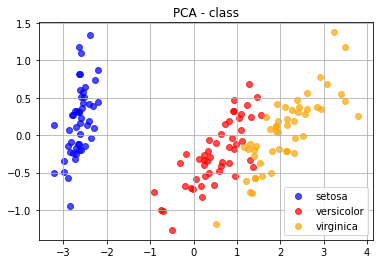

In [10]:
plt.figure()
plt.scatter(x_dr[y == 0,0], x_dr[y == 0,1], c='b', label=iris.target_names[0], alpha=0.7)
plt.scatter(x_dr[y == 1,0], x_dr[y == 1,1], c='r', label=iris.target_names[1], alpha=0.7)
plt.scatter(x_dr[y == 2,0], x_dr[y == 2,1], c='orange', label=iris.target_names[2], alpha=0.7)
plt.title('PCA - class')
plt.grid();plt.legend()
plt.show()

查看每个新特征的信息量(可解释性方差)大小

In [11]:
pca.explained_variance_

array([4.22824171, 0.24267075])

查看每个新特征信息量占原始信息量的百分比(可解释性方差贡献率)

In [12]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

在 PCA 的参数中，n_components 默认为 min(x.shape)，一般为 feature 个数，相当于没有降维，只是转换了新的坐标空间。

常用来画出累计可解释性方差贡献曲线，帮助我们决定最好的 n_components 的个数

In [13]:
pca_line = PCA().fit(x)

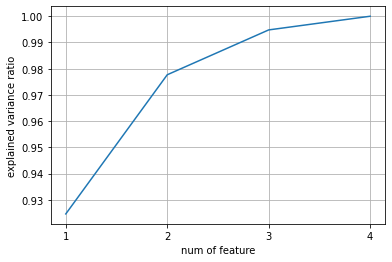

In [14]:
plt.figure()
plt.plot([1,2,3,4], np.cumsum(pca_line.explained_variance_ratio_))
plt.xticks([1,2,3,4])
plt.xlabel('num of feature');plt.ylabel('explained variance ratio')
plt.grid()
plt.show()

n_components 参数还可以选择极大似然估计 mle，这时系统会自动帮我们选取最优的个数

In [15]:
x_mle = PCA(n_components='mle').fit_transform(x)
x_mle.shape

(150, 3)

上面一行代码可知，mle 自动选择了 3 作为降维后的 feature 个数。

n_components 参数还可以选择 0-1 之间的浮点数，代表了降维后希望保留百分之多少的信息量

此时必须加上 svd_solver='full' 这个参数

In [16]:
x_f = PCA(n_components=0.97, svd_solver='full').fit_transform(x)
x_f.shape

(150, 2)

In [17]:
x_f = PCA(n_components=0.99, svd_solver='full').fit_transform(x)
x_f.shape

(150, 3)

### 人脸识别中 components_

In [18]:
from sklearn.datasets import fetch_lfw_people

In [19]:
faces = fetch_lfw_people(min_faces_per_person=60)

In [20]:
faces.data.shape

(1348, 2914)

In [21]:
faces.images.shape

(1348, 62, 47)

其中 1348 是样本个数，62 是特征矩阵行数，47 是特征矩阵列数，data 实际上就是拉平了

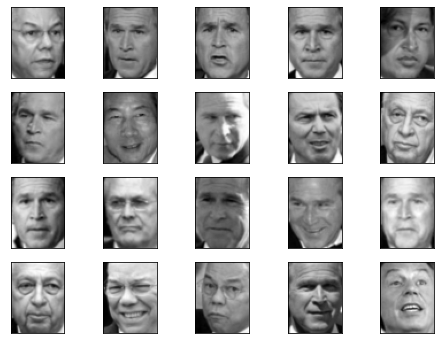

In [34]:
fig, axes = plt.subplots(4,5,
                        figsize=(8,6),
                        subplot_kw={'xticks':[],'yticks':[]})
for i in range(20):
    axes[i//5][i%5].imshow(faces.images[i,:,:],cmap='gray')

In [28]:
X = faces.data

In [29]:
pca = PCA(n_components=150).fit(X)

In [30]:
V = pca.components_
V.shape

(150, 2914)

现在来可视化 V，因为他是新的特征空间

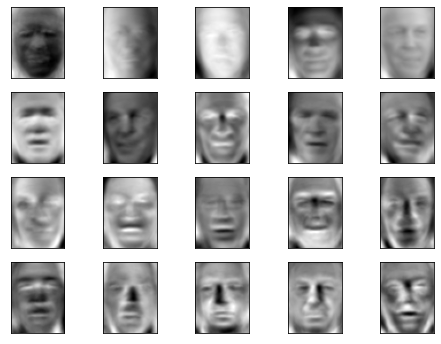

In [36]:
fig, axes = plt.subplots(4,5,
                        figsize=(8,6),
                        subplot_kw={'xticks':[],'yticks':[]})
for i in range(20):
    axes[i//5][i%5].imshow(V[i,:].reshape(62,47),cmap='gray')

可以看到其实新的特征空间上提取到的大部分都是五官和轮廓的信息

#### inverse transform
从低维度转变到高维度

In [37]:
X = faces.data
pca = PCA(n_components=150).fit(X)
x_dr = pca.transform(X)
x_inv = pca.inverse_transform(x_dr)
x_inv.shape

(1348, 2914)

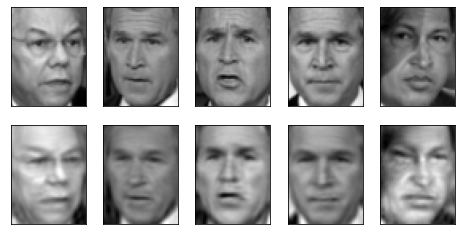

In [41]:
fig, axes = plt.subplots(2,5,
                        figsize=(8,4),
                        subplot_kw={'xticks':[],'yticks':[]})
for i in range(5):
    axes[0][i].imshow(X[i,:].reshape(62,47),cmap='gray')
    axes[1][i].imshow(x_inv[i,:].reshape(62,47),cmap='gray')

上面可以看到降维后再升维，则清晰率会降低，逆转是不可逆的，损失掉的信息不会在回来

#### 利用PCA降燥

In [42]:
from sklearn.datasets import load_digits

In [43]:
digits = load_digits()
X = digits.data

In [44]:
X.shape

(1797, 64)

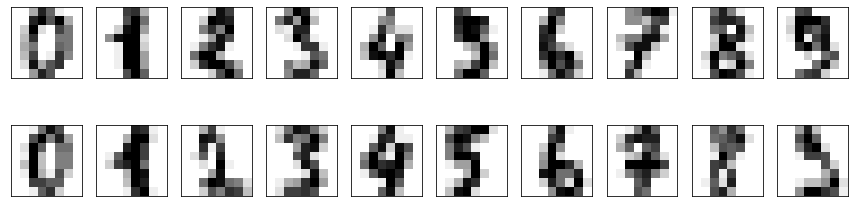

In [55]:
fig, axes = plt.subplots(2,10,
                        figsize=(15,4),
                        subplot_kw={'xticks':[],'yticks':[]})
for i,ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(8,8),cmap='binary')

添加噪声

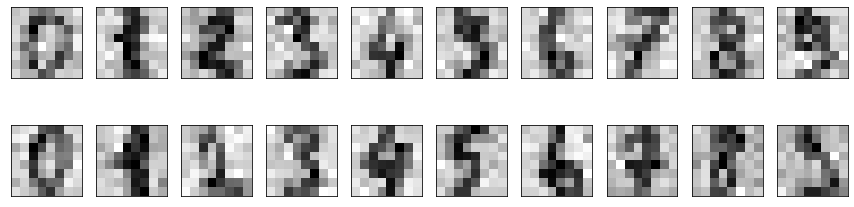

In [56]:
rng = np.random.RandomState(20)
noisy = rng.normal(digits.data,2)

fig, axes = plt.subplots(2,10,
                        figsize=(15,4),
                        subplot_kw={'xticks':[],'yticks':[]})
for i,ax in enumerate(axes.flat):
    ax.imshow(noisy[i].reshape(8,8),cmap='binary')

先降维再升维，并与原噪声进行对比

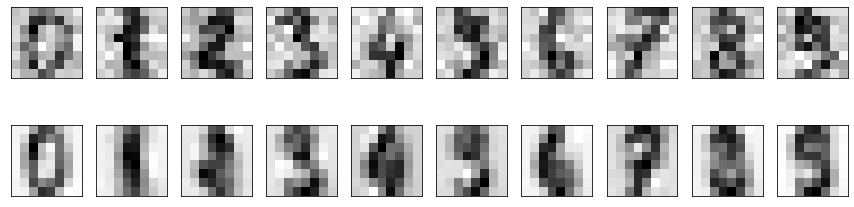

In [57]:
pca = PCA(0.5,svd_solver='full').fit(noisy)
noisy_ = pca.transform(noisy)
noisy_inv = pca.inverse_transform(noisy_)

fig, axes = plt.subplots(2,10,
                        figsize=(15,4),
                        subplot_kw={'xticks':[],'yticks':[]})
for i in range(10):
    axes[0][i].imshow(noisy[i].reshape(8,8),cmap='binary')
    axes[1][i].imshow(noisy_inv[i].reshape(8,8),cmap='binary')

可以看到噪声已经被降下去一部分了

### PCA例子 手写数字

导入数据

In [64]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

In [59]:
data = pd.read_csv('data/digit_recognizor.csv')

In [60]:
X = data.iloc[:,1:]
y = data.iloc[:,0]
X.shape

(42000, 784)

画出可结实性方差贡献率曲线

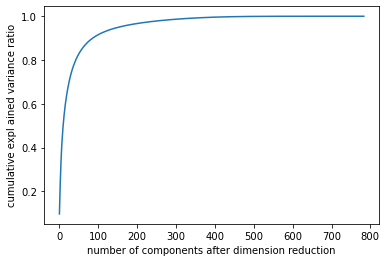

In [62]:
pca_line = PCA().fit(X)
plt.figure()
plt.plot(np.cumsum(pca_line.explained_variance_ratio_))
plt.xlabel('number of components after dimension reduction')
plt.ylabel('cumulative expl ained variance ratio')
plt.show()

用随机森林对不同的 PC 进行训练

In [ ]:
scores = []

for i in range(1,100,10):
    X_dr = PCA(n_components=i).fit_transform(X)
    tmp = RandomForestClassifier(n_estimators=10,random_state=20)
    tmp.fit(X_dr,y)
    scores.append(tmp.score(X_dr,y))

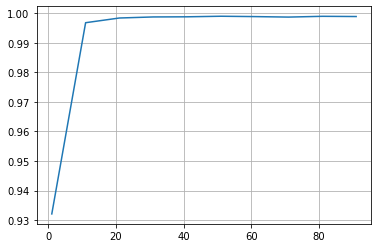

In [67]:
plt.figure()
plt.plot(range(1,100,10),scores)
plt.grid();plt.show()

再次细化

In [68]:
scores = []

for i in range(10,20):
    X_dr = PCA(n_components=i).fit_transform(X)
    tmp = RandomForestClassifier(n_estimators=10,random_state=20)
    tmp.fit(X_dr,y)
    scores.append(tmp.score(X_dr,y))

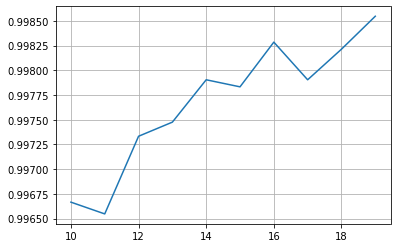

In [69]:
plt.figure()
plt.plot(range(10,20),scores)
plt.grid();plt.show()

选 20 作为主成分个数

In [70]:
X_dr = PCA(n_components=20).fit_transform(X)
rfc = RandomForestClassifier(n_estimators=10,random_state=20)
rfc.fit(X_dr,y)
rfc.score(X_dr,y)

0.9980952380952381

可见，从上百个特征降维到20个特征后，训练数据正确率依然高达99%